In [224]:
import scipy.stats as stats
import numpy as np
import sklearn as sk
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
from sklearn.ensemble import RandomForestRegressor
from matplotlib import pyplot as plt
from sklearn.model_selection import GridSearchCV, cross_val_score, train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# This is Univariate

In [225]:
def prepare_data(df, train_year, test_year):
    # Ensure datetime is in datetime format
    df['UTC time'] = pd.to_datetime(df['UTC time'])
    
    # Filter for training year (e.g., 2020) and exclude the last 24 hours
    train_data = df[(df['UTC time'].dt.year == train_year)]
    X_train = train_data['carbon_intensity'].values[:-24].reshape(-1, 1)  # All except last day
    y_train = train_data['carbon_intensity'].values[24:].reshape(-1, 1)   # Start from second day till end
    
    print(X_train.shape, y_train.shape)
    #print last value of X_train and y_train
    print(X_train[-1], y_train[-1])
    
    # Filter for testing year (e.g., 2021)
    test_data = df[(df['UTC time'].dt.year == test_year)]
    y_test = test_data['carbon_intensity'].values.reshape(-1, 1)  # All values for the test year
    print(y_test.shape)
    
    return X_train, y_train, y_test

# Load your dataset
df = pd.read_csv('./data/BPAT/BPAT_direct_emissions.csv')

# Specify the training and testing years
train_year = 2020
test_year = 2021

# Prepare the data
X_train, y_train, y_test = prepare_data(df, train_year, test_year)

# 3. Train the model (Linear Regression)
model = LinearRegression()
model.fit(X_train, y_train)

# 4. Predict the values for the test set
y_pred = model.predict(y_test[:-24])
#print(y_pred.head())

# 5. Evaluate the model
rmse = np.sqrt(mean_squared_error(y_test[24:], y_pred))
mape = mean_absolute_percentage_error(y_test[24:], y_pred)

print(f"RMSE: {rmse}")
print(f"MAPE: {mape}")

(8760, 1) (8760, 1)
[38.17] [35.02]
(8760, 1)
RMSE: 6.621993562793514
MAPE: 0.12932032675796298


# The following code blocks are all multivariate

In [226]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
from sklearn.preprocessing import MinMaxScaler

# Load your dataset
df = pd.read_csv('./data/BPAT/BPAT_direct_emissions.csv')

# Ensure 'UTC time' is in datetime format
df['UTC time'] = pd.to_datetime(df['UTC time'])

# Filter out February 29 for the leap year (2020) to ensure alignment
df = df[~((df['UTC time'].dt.year == 2020) & 
          (df['UTC time'].dt.month == 2) & 
          (df['UTC time'].dt.day == 29))]

# Specify the training and testing years
train_year = 2020
test_year = 2021

# Filter for the training year and prepare training data
train_data = df[df['UTC time'].dt.year == train_year]
X_train = train_data[['nat_gas', 'carbon_intensity']].values[:-24]  # Features for training
y_train = train_data['carbon_intensity'].values[24:].reshape(-1, 1)  # Target for training

# Filter for the testing year and prepare testing data
test_data = df[df['UTC time'].dt.year == test_year]
X_test = test_data[['nat_gas', 'carbon_intensity']].values[:-24]  # Features for testing
y_test = test_data['carbon_intensity'].values[24:].reshape(-1, 1)  # Target for testing

# Normalize the feature values using MinMaxScaler
scaler_X = MinMaxScaler()
X_train = scaler_X.fit_transform(X_train)
X_test = scaler_X.transform(X_test)

# Normalize the target values using MinMaxScaler
scaler_y = MinMaxScaler()
y_train = scaler_y.fit_transform(y_train)
y_test = scaler_y.transform(y_test)

# Print column names for verification
print("Training Features (X_train columns):", ['nat_gas', 'carbon_intensity'])
print("Training Target (y_train column): ['carbon_intensity']")
print("Testing Features (X_test columns):", ['nat_gas', 'carbon_intensity'])
print("Testing Target (y_test column): ['carbon_intensity']")
print("\n")

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test[:-24])

# Inverse transform predictions and target to get them back to the original scale
y_pred = scaler_y.inverse_transform(y_pred)
y_test_original = scaler_y.inverse_transform(y_test[24:])

# Evaluate the model
rmse = np.sqrt(mean_squared_error(y_test_original, y_pred))
mape = mean_absolute_percentage_error(y_test_original, y_pred)

# Print the results
print("Results for Energy Source: nat_gas")
print(f"  RMSE: {rmse}")
print(f"  MAPE: {mape}\n")

Training Features (X_train columns): ['nat_gas', 'carbon_intensity']
Training Target (y_train column): ['carbon_intensity']
Testing Features (X_test columns): ['nat_gas', 'carbon_intensity']
Testing Target (y_test column): ['carbon_intensity']


Results for Energy Source: nat_gas
  RMSE: 8.4074867842048
  MAPE: 0.17569031145874328



In [227]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
from sklearn.preprocessing import MinMaxScaler

# Load your dataset
df = pd.read_csv('./data/BPAT/BPAT_direct_emissions.csv')

# Ensure 'UTC time' is in datetime format
df['UTC time'] = pd.to_datetime(df['UTC time'])

# Filter out February 29 for the leap year (2020) to ensure alignment
df = df[~((df['UTC time'].dt.year == 2020) & 
          (df['UTC time'].dt.month == 2) & 
          (df['UTC time'].dt.day == 29))]

# Specify the training and testing years
train_year = 2020
test_year = 2021

# Filter for the training year and prepare training data
train_data = df[df['UTC time'].dt.year == train_year]
X_train = train_data[['nat_gas', 'carbon_intensity', 'nuclear']].values[:-24]  # Features for training
y_train = train_data['carbon_intensity'].values[24:].reshape(-1, 1)  # Target for training

# Filter for the testing year and prepare testing data
test_data = df[df['UTC time'].dt.year == test_year]
X_test = test_data[['nat_gas', 'carbon_intensity', 'nuclear']].values[:-24]  # Features for testing
y_test = test_data['carbon_intensity'].values[24:].reshape(-1, 1)  # Target for testing

# Normalize the feature values using MinMaxScaler
scaler_X = MinMaxScaler()
X_train = scaler_X.fit_transform(X_train)
X_test = scaler_X.transform(X_test)

# Normalize the target values using MinMaxScaler
scaler_y = MinMaxScaler()
y_train = scaler_y.fit_transform(y_train)
y_test = scaler_y.transform(y_test)

# Print column names for verification
print("Training Features (X_train columns):", ['nat_gas', 'carbon_intensity', 'nuclear'])
print("Training Target (y_train column): ['carbon_intensity']")
print("Testing Features (X_test columns):", ['nat_gas', 'carbon_intensity', 'nuclear'])
print("Testing Target (y_test column): ['carbon_intensity']")
print("\n")

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test[:-24])

# Inverse transform predictions and target to get them back to the original scale
y_pred = scaler_y.inverse_transform(y_pred)
y_test_original = scaler_y.inverse_transform(y_test[24:])

# Evaluate the model
rmse = np.sqrt(mean_squared_error(y_test_original, y_pred))
mape = mean_absolute_percentage_error(y_test_original, y_pred)

# Print the results
print("Results for Energy Source: nat_gas, carbon_intensity, and nuclear")
print(f"  RMSE: {rmse}")
print(f"  MAPE: {mape}\n")

Training Features (X_train columns): ['nat_gas', 'carbon_intensity', 'nuclear']
Training Target (y_train column): ['carbon_intensity']
Testing Features (X_test columns): ['nat_gas', 'carbon_intensity', 'nuclear']
Testing Target (y_test column): ['carbon_intensity']


Results for Energy Source: nat_gas, carbon_intensity, and nuclear
  RMSE: 8.395113409299668
  MAPE: 0.1761367677721788



# Doing multivariate linear regression with only 2 features for all the energy sources

In [228]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
from sklearn.preprocessing import MinMaxScaler

def prepare_data(df, train_year, test_year, feature_column):
    # Ensure 'UTC time' is in datetime format
    df['UTC time'] = pd.to_datetime(df['UTC time'])
    
    # Filter out February 29 for the leap year (2020) to ensure alignment
    df = df[~((df['UTC time'].dt.year == 2020) & 
              (df['UTC time'].dt.month == 2) & 
              (df['UTC time'].dt.day == 29))]
    
    # Filter for the training year
    train_data = df[df['UTC time'].dt.year == train_year]
    X_train = train_data[[feature_column, 'carbon_intensity']].values[:-24]  # Exclude last 24 rows
    y_train = train_data['carbon_intensity'].values[24:].reshape(-1, 1)      # Exclude first 24 rows to align

    # Filter for the testing year
    test_data = df[df['UTC time'].dt.year == test_year]
    X_test = test_data[[feature_column, 'carbon_intensity']].values[:-24]    # Use all rows for testing features
    y_test = test_data['carbon_intensity'].values[24:].reshape(-1, 1)        # Use all rows for testing target

    # Normalize the feature values using MinMaxScaler
    scaler_X = MinMaxScaler()
    X_train = scaler_X.fit_transform(X_train)
    X_test = scaler_X.transform(X_test)

    # Normalize the target values using MinMaxScaler
    scaler_y = MinMaxScaler()
    y_train = scaler_y.fit_transform(y_train)
    y_test = scaler_y.transform(y_test)

    # Print column names
    print("Training Features (X_train columns):", [feature_column, 'carbon_intensity'])
    print("Training Target (y_train column): ['carbon_intensity']")
    print("Testing Features (X_test columns):", [feature_column, 'carbon_intensity'])
    print("Testing Target (y_test column): ['carbon_intensity']")
    print("\n")
    
    return X_train, y_train, X_test, y_test, scaler_y

def evaluate_energy_sources(df, train_year, test_year, energy_sources):
    results = []

    for feature_column in energy_sources:
        # Prepare data for the current energy source
        X_train, y_train, X_test, y_test, scaler_y = prepare_data(df, train_year, test_year, feature_column)
        
        # Train the model
        model = LinearRegression()
        model.fit(X_train, y_train)
        
        # Predict on the test set, aligning with 24-hour shift
        y_pred = model.predict(X_test[:-24])
        
        # Inverse transform predictions and target to get them back to the original scale
        y_pred_original = scaler_y.inverse_transform(y_pred)
        y_test_original = scaler_y.inverse_transform(y_test[24:])

        # Evaluate the model using corresponding `y_test` values from the 24th row onward
        rmse = np.sqrt(mean_squared_error(y_test_original, y_pred_original))
        mape = mean_absolute_percentage_error(y_test_original, y_pred_original)
        
        # Store the results
        results.append({
            "Energy Source": feature_column,
            "RMSE": rmse,
            "MAPE": mape
        })
        
        # Print the results for each energy source
        print(f"Energy Source: {feature_column}")
        print(f"  RMSE: {rmse}")
        print(f"  MAPE: {mape}\n")
    
    # Convert results to DataFrame for easy comparison and display all results
    results_df = pd.DataFrame(results)
    print("All Results for Each Energy Source as a feature with carbon_intensity:")
    print(results_df)
    
    return results_df

# Load your dataset
df = pd.read_csv('./data/BPAT/BPAT_direct_emissions.csv')

# Specify the training and testing years
train_year = 2020
test_year = 2021

# List of energy sources to evaluate
energy_sources = ['nat_gas', 'nuclear', 'hydro', 'solar', 'wind', 'other']

# Evaluate each energy source and display results
results_df = evaluate_energy_sources(df, train_year, test_year, energy_sources)
min_mape = results_df['MAPE'].min()
max_mape = results_df['MAPE'].max()

print(f"\nMinimum MAPE: {min_mape}")
print(f"Maximum MAPE: {max_mape}")

Training Features (X_train columns): ['nat_gas', 'carbon_intensity']
Training Target (y_train column): ['carbon_intensity']
Testing Features (X_test columns): ['nat_gas', 'carbon_intensity']
Testing Target (y_test column): ['carbon_intensity']


Energy Source: nat_gas
  RMSE: 8.4074867842048
  MAPE: 0.17569031145874328

Training Features (X_train columns): ['nuclear', 'carbon_intensity']
Training Target (y_train column): ['carbon_intensity']
Testing Features (X_test columns): ['nuclear', 'carbon_intensity']
Testing Target (y_test column): ['carbon_intensity']


Energy Source: nuclear
  RMSE: 8.39842092766363
  MAPE: 0.17615126330904238

Training Features (X_train columns): ['hydro', 'carbon_intensity']
Training Target (y_train column): ['carbon_intensity']
Testing Features (X_test columns): ['hydro', 'carbon_intensity']
Testing Target (y_test column): ['carbon_intensity']


Energy Source: hydro
  RMSE: 8.297418556659624
  MAPE: 0.18413973018279467

Training Features (X_train columns): 

# Doing multivariate linear regression with only 3 features for all the energy sources, i.e 2 energy sources and carbon intensity

In [229]:
from itertools import combinations
import math
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
from sklearn.preprocessing import MinMaxScaler

def prepare_data(df, train_year, test_year, feature_columns):
    # Ensure 'UTC time' is in datetime format
    df['UTC time'] = pd.to_datetime(df['UTC time'])
    
    # Filter out February 29 for the leap year (2020) to ensure alignment
    df = df[~((df['UTC time'].dt.year == 2020) & 
              (df['UTC time'].dt.month == 2) & 
              (df['UTC time'].dt.day == 29))]
    
    # Filter for the training year
    train_data = df[df['UTC time'].dt.year == train_year]
    X_train = train_data[feature_columns + ['carbon_intensity']].values[:-24]  # Exclude last 24 rows
    y_train = train_data['carbon_intensity'].values[24:].reshape(-1, 1)       # Exclude first 24 rows to align

    # Filter for the testing year
    test_data = df[df['UTC time'].dt.year == test_year]
    X_test = test_data[feature_columns + ['carbon_intensity']].values[:-24]   # Use all rows for testing features
    y_test = test_data['carbon_intensity'].values[24:].reshape(-1, 1)         # Use all rows for testing target

    # Normalize the feature values using MinMaxScaler
    scaler_X = MinMaxScaler()
    X_train = scaler_X.fit_transform(X_train)
    X_test = scaler_X.transform(X_test)

    # Normalize the target values using MinMaxScaler
    scaler_y = MinMaxScaler()
    y_train = scaler_y.fit_transform(y_train)
    y_test = scaler_y.transform(y_test)

    # Print column names
    print("Training Features (X_train columns):", feature_columns + ['carbon_intensity'])
    print("Training Target (y_train column): ['carbon_intensity']")
    print("Testing Features (X_test columns):", feature_columns + ['carbon_intensity'])
    print("Testing Target (y_test column): ['carbon_intensity']")
    print("\n")
    
    return X_train, y_train, X_test, y_test, scaler_y

def evaluate_energy_sources(df, train_year, test_year, energy_sources):
    results = []

    # Generate all combinations of two energy sources
    for feature_columns in combinations(energy_sources, 2):
        feature_columns = list(feature_columns)  # Convert tuple to list for processing
        
        # Prepare data for the current pair of energy sources plus 'carbon_intensity'
        X_train, y_train, X_test, y_test, scaler_y = prepare_data(df, train_year, test_year, feature_columns)
        
        # Train the model
        model = LinearRegression()
        model.fit(X_train, y_train)
        
        # Predict on the test set, aligning with 24-hour shift
        y_pred = model.predict(X_test[:-24])
        
        # Inverse transform predictions and target to get them back to the original scale
        y_pred_original = scaler_y.inverse_transform(y_pred)
        y_test_original = scaler_y.inverse_transform(y_test[24:])

        # Evaluate the model using corresponding `y_test` values from the 24th row onward
        rmse = np.sqrt(mean_squared_error(y_test_original, y_pred_original))
        mape = mean_absolute_percentage_error(y_test_original, y_pred_original)
        
        # Store the results
        results.append({
            "Energy Sources": f"{feature_columns[0]} + {feature_columns[1]} + carbon_intensity",
            "RMSE": rmse,
            "MAPE": mape
        })
        
        # Print the results for each energy source combination
        print(f"Energy Sources: {feature_columns[0]}, {feature_columns[1]} + carbon_intensity")
        print(f"  RMSE: {rmse}")
        print(f"  MAPE: {mape}\n")
    
    # Convert results to DataFrame for easy comparison and display all results
    results_df = pd.DataFrame(results)
    print("All Results for Each Combination of 2 Energy Sources with carbon_intensity:")
    print(results_df)
    
    return results_df

# Load your dataset
df = pd.read_csv('./data/BPAT/BPAT_direct_emissions.csv')

# Specify the training and testing years
train_year = 2020
test_year = 2021

# List of energy sources to evaluate
energy_sources = ['nat_gas', 'nuclear', 'hydro', 'solar', 'wind', 'other']

# Evaluate each combination of 2 energy sources with 'carbon_intensity' and display results
results_df = evaluate_energy_sources(df, train_year, test_year, energy_sources)
min_mape = results_df['MAPE'].min()
max_mape = results_df['MAPE'].max()

print(f"\nMinimum MAPE: {min_mape}")
print(f"Maximum MAPE: {max_mape}")
print("Possible combinations with 6 choose 2 is:", math.comb(6, 2))


Training Features (X_train columns): ['nat_gas', 'nuclear', 'carbon_intensity']
Training Target (y_train column): ['carbon_intensity']
Testing Features (X_test columns): ['nat_gas', 'nuclear', 'carbon_intensity']
Testing Target (y_test column): ['carbon_intensity']


Energy Sources: nat_gas, nuclear + carbon_intensity
  RMSE: 8.395113409299668
  MAPE: 0.17613676777217874

Training Features (X_train columns): ['nat_gas', 'hydro', 'carbon_intensity']
Training Target (y_train column): ['carbon_intensity']
Testing Features (X_test columns): ['nat_gas', 'hydro', 'carbon_intensity']
Testing Target (y_test column): ['carbon_intensity']


Energy Sources: nat_gas, hydro + carbon_intensity
  RMSE: 8.108245007111474
  MAPE: 0.1804378776627787

Training Features (X_train columns): ['nat_gas', 'solar', 'carbon_intensity']
Training Target (y_train column): ['carbon_intensity']
Testing Features (X_test columns): ['nat_gas', 'solar', 'carbon_intensity']
Testing Target (y_test column): ['carbon_intensi

# Doing multivariate linear regression with only 4 features for all the energy sources, i.e 3 energy sources and carbon intensity

In [230]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
from sklearn.preprocessing import MinMaxScaler
from itertools import combinations
import math

def prepare_data(df, train_year, test_year, feature_columns):
    # Ensure 'UTC time' is in datetime format
    df['UTC time'] = pd.to_datetime(df['UTC time'])
    
    # Filter out February 29 for the leap year (2020) to ensure alignment
    df = df[~((df['UTC time'].dt.year == 2020) & 
              (df['UTC time'].dt.month == 2) & 
              (df['UTC time'].dt.day == 29))]
    
    # Filter for the training year
    train_data = df[df['UTC time'].dt.year == train_year]
    X_train = train_data[feature_columns + ['carbon_intensity']].values[:-24]  # Exclude last 24 rows
    y_train = train_data['carbon_intensity'].values[24:].reshape(-1, 1)       # Exclude first 24 rows to align

    # Filter for the testing year
    test_data = df[df['UTC time'].dt.year == test_year]
    X_test = test_data[feature_columns + ['carbon_intensity']].values[:-24]   # Use all rows for testing features
    y_test = test_data['carbon_intensity'].values[24:].reshape(-1, 1)         # Use all rows for testing target

    # Normalize the feature values using MinMaxScaler
    scaler_X = MinMaxScaler()
    X_train = scaler_X.fit_transform(X_train)
    X_test = scaler_X.transform(X_test)

    # Normalize the target values using MinMaxScaler
    scaler_y = MinMaxScaler()
    y_train = scaler_y.fit_transform(y_train)
    y_test = scaler_y.transform(y_test)

    # Print column names
    print("Training Features (X_train columns):", feature_columns + ['carbon_intensity'])
    print("Training Target (y_train column): ['carbon_intensity']")
    print("Testing Features (X_test columns):", feature_columns + ['carbon_intensity'])
    print("Testing Target (y_test column): ['carbon_intensity']")
    print("\n")
    
    return X_train, y_train, X_test, y_test, scaler_y

def evaluate_energy_sources(df, train_year, test_year, energy_sources):
    results = []

    # Generate all combinations of three energy sources
    for feature_columns in combinations(energy_sources, 3):
        feature_columns = list(feature_columns)  # Convert tuple to list for processing
        
        # Prepare data for the current triplet of energy sources plus 'carbon_intensity'
        X_train, y_train, X_test, y_test, scaler_y = prepare_data(df, train_year, test_year, feature_columns)
        
        # Train the model
        model = LinearRegression()
        model.fit(X_train, y_train)
        
        # Predict on the test set, aligning with 24-hour shift
        y_pred = model.predict(X_test[:-24])
        
        # Inverse transform predictions and target to get them back to the original scale
        y_pred_original = scaler_y.inverse_transform(y_pred)
        y_test_original = scaler_y.inverse_transform(y_test[24:])

        # Evaluate the model using corresponding `y_test` values from the 24th row onward
        rmse = np.sqrt(mean_squared_error(y_test_original, y_pred_original))
        mape = mean_absolute_percentage_error(y_test_original, y_pred_original)
        
        # Store the results
        results.append({
            "Energy Sources": f"{feature_columns[0]}, {feature_columns[1]}, {feature_columns[2]} + carbon_intensity",
            "RMSE": rmse,
            "MAPE": mape
        })
        
        # Print the results for each combination of energy sources
        print(f"Energy Sources: {feature_columns[0]}, {feature_columns[1]}, {feature_columns[2]} + carbon_intensity")
        print(f"  RMSE: {rmse}")
        print(f"  MAPE: {mape}\n")
    
    # Convert results to DataFrame for easy comparison and display all results
    results_df = pd.DataFrame(results)
    print("All Results for Each Combination of 3 Energy Sources with carbon_intensity:")
    print(results_df)
    
    return results_df

# Load your dataset
df = pd.read_csv('./data/BPAT/BPAT_direct_emissions.csv')

# Specify the training and testing years
train_year = 2020
test_year = 2021

# List of energy sources to evaluate
energy_sources = ['nat_gas', 'nuclear', 'hydro', 'solar', 'wind', 'other']

# Evaluate each combination of 3 energy sources with 'carbon_intensity' and display results
results_df = evaluate_energy_sources(df, train_year, test_year, energy_sources)
min_mape = results_df['MAPE'].min()
max_mape = results_df['MAPE'].max()

print(f"\nMinimum MAPE: {min_mape}")
print(f"Maximum MAPE: {max_mape}")
print("Possible combinations with 6 choose 3 is: ", math.comb(6, 3))


Training Features (X_train columns): ['nat_gas', 'nuclear', 'hydro', 'carbon_intensity']
Training Target (y_train column): ['carbon_intensity']
Testing Features (X_test columns): ['nat_gas', 'nuclear', 'hydro', 'carbon_intensity']
Testing Target (y_test column): ['carbon_intensity']


Energy Sources: nat_gas, nuclear, hydro + carbon_intensity
  RMSE: 8.124331194982682
  MAPE: 0.18189627450776752

Training Features (X_train columns): ['nat_gas', 'nuclear', 'solar', 'carbon_intensity']
Training Target (y_train column): ['carbon_intensity']
Testing Features (X_test columns): ['nat_gas', 'nuclear', 'solar', 'carbon_intensity']
Testing Target (y_test column): ['carbon_intensity']


Energy Sources: nat_gas, nuclear, solar + carbon_intensity
  RMSE: 8.391392324653896
  MAPE: 0.17612529731124935

Training Features (X_train columns): ['nat_gas', 'nuclear', 'wind', 'carbon_intensity']
Training Target (y_train column): ['carbon_intensity']
Testing Features (X_test columns): ['nat_gas', 'nuclear',

# Doing multivariate linear regression with only 5 features for all the energy sources, i.e 4 energy sources and carbon intensity

In [231]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
from sklearn.preprocessing import MinMaxScaler
from itertools import combinations

def prepare_data(df, train_year, test_year, feature_columns):
    # Ensure datetime is in datetime format
    df['UTC time'] = pd.to_datetime(df['UTC time'])
    
    # Filter out February 29 for the leap year (2020) to ensure alignment
    df = df[~((df['UTC time'].dt.year == 2020) & 
              (df['UTC time'].dt.month == 2) & 
              (df['UTC time'].dt.day == 29))]
    
    # Filter for the training year
    train_data = df[df['UTC time'].dt.year == train_year]
    X_train = train_data[feature_columns + ['carbon_intensity']].values[:-24]  # Exclude last 24 rows
    y_train = train_data['carbon_intensity'].values[24:].reshape(-1, 1)       # Exclude first 24 rows to align

    # Filter for the testing year
    test_data = df[df['UTC time'].dt.year == test_year]
    X_test = test_data[feature_columns + ['carbon_intensity']].values[:-24]   # Use all rows for testing features
    y_test = test_data['carbon_intensity'].values[24:].reshape(-1, 1)         # Use all rows for testing target

    # Normalize the feature values using MinMaxScaler
    scaler_X = MinMaxScaler()
    X_train = scaler_X.fit_transform(X_train)
    X_test = scaler_X.transform(X_test)

    # Normalize the target values using MinMaxScaler
    scaler_y = MinMaxScaler()
    y_train = scaler_y.fit_transform(y_train)
    y_test = scaler_y.transform(y_test)

    return X_train, y_train, X_test, y_test, scaler_y

def evaluate_energy_sources(df, train_year, test_year, energy_sources):
    results = []

    # Generate all combinations of four energy sources
    for feature_columns in combinations(energy_sources, 4):
        feature_columns = list(feature_columns)  # Convert tuple to list for processing
        
        # Prepare data for the current set of four energy sources plus 'carbon_intensity'
        X_train, y_train, X_test, y_test, scaler_y = prepare_data(df, train_year, test_year, feature_columns)
        
        # Train the model
        model = LinearRegression()
        model.fit(X_train, y_train)
        
        # Predict on the test set, aligning with 24-hour shift
        y_pred = model.predict(X_test[:-24])
        
        # Inverse transform predictions and target to get them back to the original scale
        y_pred_original = scaler_y.inverse_transform(y_pred)
        y_test_original = scaler_y.inverse_transform(y_test[24:])

        # Evaluate the model using corresponding `y_test` values from the 24th row onward
        rmse = np.sqrt(mean_squared_error(y_test_original, y_pred_original))
        mape = mean_absolute_percentage_error(y_test_original, y_pred_original)
        
        # Store the results
        results.append({
            "Energy Sources": f"{feature_columns[0]}, {feature_columns[1]}, {feature_columns[2]}, {feature_columns[3]} + carbon_intensity",
            "RMSE": rmse,
            "MAPE": mape
        })
        
        # Print the results for each combination of energy sources
        print(f"Energy Sources: {feature_columns[0]}, {feature_columns[1]}, {feature_columns[2]}, {feature_columns[3]} + carbon_intensity")
        print(f"  RMSE: {rmse}")
        print(f"  MAPE: {mape}\n")
    
    # Convert results to DataFrame for easy comparison and display all results
    results_df = pd.DataFrame(results)
    print("All Results for Each Combination of 4 Energy Sources with carbon_intensity:")
    print(results_df)
    
    # Find and print the minimum and maximum MAPE values
    min_mape = results_df['MAPE'].min()
    max_mape = results_df['MAPE'].max()
    
    min_mape_row = results_df.loc[results_df['MAPE'].idxmin()]
    max_mape_row = results_df.loc[results_df['MAPE'].idxmax()]
    
    print(f"\nCombination with Minimum MAPE:\n{min_mape_row}")
    print(f"\nCombination with Maximum MAPE:\n{max_mape_row}")

    return results_df

# Load your dataset
df = pd.read_csv('./data/BPAT/BPAT_direct_emissions.csv')

# Specify the training and testing years
train_year = 2020
test_year = 2021

# List of energy sources to evaluate
energy_sources = ['nat_gas', 'nuclear', 'hydro', 'solar', 'wind', 'other']

# Evaluate each combination of 4 energy sources with 'carbon_intensity' and display results
results_df = evaluate_energy_sources(df, train_year, test_year, energy_sources)

Energy Sources: nat_gas, nuclear, hydro, solar + carbon_intensity
  RMSE: 8.128632007923324
  MAPE: 0.1827117192961438

Energy Sources: nat_gas, nuclear, hydro, wind + carbon_intensity
  RMSE: 8.043158183036425
  MAPE: 0.17685372225559104

Energy Sources: nat_gas, nuclear, hydro, other + carbon_intensity
  RMSE: 8.12421685191314
  MAPE: 0.18277746486790916

Energy Sources: nat_gas, nuclear, solar, wind + carbon_intensity
  RMSE: 8.117674076749045
  MAPE: 0.1727331186529532

Energy Sources: nat_gas, nuclear, solar, other + carbon_intensity
  RMSE: 8.383741949704401
  MAPE: 0.1758979367534539

Energy Sources: nat_gas, nuclear, wind, other + carbon_intensity
  RMSE: 8.118017315553782
  MAPE: 0.17237006955174763

Energy Sources: nat_gas, hydro, solar, wind + carbon_intensity
  RMSE: 8.051713649962009
  MAPE: 0.17819937875166844

Energy Sources: nat_gas, hydro, solar, other + carbon_intensity
  RMSE: 8.105738125053122
  MAPE: 0.18152617345941777

Energy Sources: nat_gas, hydro, wind, other 

# Doing multivariate linear regression with only 6 features for all the energy sources, i.e 5 energy sources and carbon intensity

In [232]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
from sklearn.preprocessing import MinMaxScaler
from itertools import combinations

def prepare_data(df, train_year, test_year, feature_columns):
    # Ensure 'UTC time' is in datetime format
    df['UTC time'] = pd.to_datetime(df['UTC time'])
    
    # Filter out February 29 for the leap year (2020) to ensure alignment
    df = df[~((df['UTC time'].dt.year == 2020) & 
              (df['UTC time'].dt.month == 2) & 
              (df['UTC time'].dt.day == 29))]
    
    # Filter for the training year
    train_data = df[df['UTC time'].dt.year == train_year]
    X_train = train_data[feature_columns + ['carbon_intensity']].values[:-24]  # Exclude last 24 rows
    y_train = train_data['carbon_intensity'].values[24:].reshape(-1, 1)       # Exclude first 24 rows to align

    # Filter for the testing year
    test_data = df[df['UTC time'].dt.year == test_year]
    X_test = test_data[feature_columns + ['carbon_intensity']].values[:-24]   # Use all rows for testing features
    y_test = test_data['carbon_intensity'].values[24:].reshape(-1, 1)         # Use all rows for testing target

    # Normalize the feature values using MinMaxScaler
    scaler_X = MinMaxScaler()
    X_train = scaler_X.fit_transform(X_train)
    X_test = scaler_X.transform(X_test)

    # Normalize the target values using MinMaxScaler
    scaler_y = MinMaxScaler()
    y_train = scaler_y.fit_transform(y_train)
    y_test = scaler_y.transform(y_test)

    return X_train, y_train, X_test, y_test, scaler_y

def evaluate_energy_sources(df, train_year, test_year, energy_sources):
    results = []

    # Generate all combinations of five energy sources
    for feature_columns in combinations(energy_sources, 5):
        feature_columns = list(feature_columns)  # Convert tuple to list for processing
        
        # Prepare data for the current set of five energy sources plus 'carbon_intensity'
        X_train, y_train, X_test, y_test, scaler_y = prepare_data(df, train_year, test_year, feature_columns)
        
        # Train the model
        model = LinearRegression()
        model.fit(X_train, y_train)
        
        # Predict on the test set, aligning with 24-hour shift
        y_pred = model.predict(X_test[:-24])
        
        # Inverse transform predictions and target to get them back to the original scale
        y_pred_original = scaler_y.inverse_transform(y_pred)
        y_test_original = scaler_y.inverse_transform(y_test[24:])

        # Evaluate the model using corresponding `y_test` values from the 24th row onward
        rmse = np.sqrt(mean_squared_error(y_test_original, y_pred_original))
        mape = mean_absolute_percentage_error(y_test_original, y_pred_original)
        
        # Store the results
        results.append({
            "Energy Sources": f"{feature_columns[0]}, {feature_columns[1]}, {feature_columns[2]}, {feature_columns[3]}, {feature_columns[4]} + carbon_intensity",
            "RMSE": rmse,
            "MAPE": mape
        })
        
        # Print the results for each combination of energy sources
        print(f"Energy Sources: {feature_columns[0]}, {feature_columns[1]}, {feature_columns[2]}, {feature_columns[3]}, {feature_columns[4]} + carbon_intensity")
        print(f"  RMSE: {rmse}")
        print(f"  MAPE: {mape}\n")
    
    # Convert results to DataFrame for easy comparison and display all results
    results_df = pd.DataFrame(results)
    print("All Results for Each Combination of 5 Energy Sources with carbon_intensity:")
    print(results_df)
    
    # Find and print the minimum and maximum MAPE values
    min_mape = results_df['MAPE'].min()
    max_mape = results_df['MAPE'].max()
    
    min_mape_row = results_df.loc[results_df['MAPE'].idxmin()]
    max_mape_row = results_df.loc[results_df['MAPE'].idxmax()]
    
    print(f"\nCombination with Minimum MAPE:\n{min_mape_row}")
    print(f"\nCombination with Maximum MAPE:\n{max_mape_row}")

    return results_df

# Load your dataset
df = pd.read_csv('./data/BPAT/BPAT_direct_emissions.csv')

# Specify the training and testing years
train_year = 2020
test_year = 2021

# List of energy sources to evaluate
energy_sources = ['nat_gas', 'nuclear', 'hydro', 'solar', 'wind', 'other']

# Evaluate each combination of 5 energy sources with 'carbon_intensity' and display results
results_df = evaluate_energy_sources(df, train_year, test_year, energy_sources)

Energy Sources: nat_gas, nuclear, hydro, solar, wind + carbon_intensity
  RMSE: 8.044509062037232
  MAPE: 0.17753493375942878

Energy Sources: nat_gas, nuclear, hydro, solar, other + carbon_intensity
  RMSE: 8.131603050186987
  MAPE: 0.1839691214983756

Energy Sources: nat_gas, nuclear, hydro, wind, other + carbon_intensity
  RMSE: 8.040019664598864
  MAPE: 0.1773647068615728

Energy Sources: nat_gas, nuclear, solar, wind, other + carbon_intensity
  RMSE: 8.110421897154607
  MAPE: 0.17261658921059836

Energy Sources: nat_gas, hydro, solar, wind, other + carbon_intensity
  RMSE: 8.04402737673927
  MAPE: 0.17844810601340963

Energy Sources: nuclear, hydro, solar, wind, other + carbon_intensity
  RMSE: 8.077880371199342
  MAPE: 0.17600465698130932

All Results for Each Combination of 5 Energy Sources with carbon_intensity:
                                      Energy Sources      RMSE      MAPE
0  nat_gas, nuclear, hydro, solar, wind + carbon_...  8.044509  0.177535
1  nat_gas, nuclear, h

# Doing multivariate linear regression with only 7 features for all the energy sources, i.e all 6 energy sources and carbon intensity

In [233]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
from sklearn.preprocessing import MinMaxScaler

def prepare_data(df, train_year, test_year, feature_columns):
    # Ensure datetime is in datetime format
    df['UTC time'] = pd.to_datetime(df['UTC time'])
    
    # Filter out February 29 for the leap year (2020) to ensure alignment
    df = df[~((df['UTC time'].dt.year == 2020) & 
              (df['UTC time'].dt.month == 2) & 
              (df['UTC time'].dt.day == 29))]
    
    # Filter for the training year
    train_data = df[df['UTC time'].dt.year == train_year]
    X_train = train_data[feature_columns + ['carbon_intensity']].values[:-24]  # Exclude last 24 rows
    y_train = train_data['carbon_intensity'].values[24:].reshape(-1, 1)       # Exclude first 24 rows to align

    # Filter for the testing year
    test_data = df[df['UTC time'].dt.year == test_year]
    X_test = test_data[feature_columns + ['carbon_intensity']].values[:-24]   # Use all rows for testing features
    y_test = test_data['carbon_intensity'].values[24:].reshape(-1, 1)         # Use all rows for testing target

    # Normalize the feature values using MinMaxScaler
    scaler_X = MinMaxScaler()
    X_train = scaler_X.fit_transform(X_train)
    X_test = scaler_X.transform(X_test)

    # Normalize the target values using MinMaxScaler
    scaler_y = MinMaxScaler()
    y_train = scaler_y.fit_transform(y_train)
    y_test = scaler_y.transform(y_test)

    return X_train, y_train, X_test, y_test, scaler_y

def evaluate_all_energy_sources(df, train_year, test_year):
    # Define the list of all energy sources
    energy_sources = ['nat_gas', 'nuclear', 'hydro', 'solar', 'wind', 'other']
    
    # Use all six energy sources + 'carbon_intensity' as features
    X_train, y_train, X_test, y_test, scaler_y = prepare_data(df, train_year, test_year, energy_sources)
    
    # Train the model
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    # Predict on the test set, aligning with 24-hour shift
    y_pred = model.predict(X_test[:-24])
    
    # Inverse transform predictions and target to get them back to the original scale
    y_pred_original = scaler_y.inverse_transform(y_pred)
    y_test_original = scaler_y.inverse_transform(y_test[24:])

    # Evaluate the model using corresponding `y_test` values from the 24th row onward
    rmse = np.sqrt(mean_squared_error(y_test_original, y_pred_original))
    mape = mean_absolute_percentage_error(y_test_original, y_pred_original)
    
    # Print the results
    print("All Six Energy Sources + carbon_intensity as Features:")
    print(f"  RMSE: {rmse}")
    print(f"  MAPE: {mape}\n")

# Load your dataset
df = pd.read_csv('./data/BPAT/BPAT_direct_emissions.csv')

# Specify the training and testing years
train_year = 2020
test_year = 2021

# Evaluate the model using all energy sources and carbon_intensity as features
evaluate_all_energy_sources(df, train_year, test_year)

All Six Energy Sources + carbon_intensity as Features:
  RMSE: 8.043010843736454
  MAPE: 0.17834810618588057



# Evaluating the Results

All Results:
     Num Features                                       Features      MAPE  \
0              1                                      [nat_gas]  0.175690   
1              1                                      [nuclear]  0.176151   
2              1                                        [hydro]  0.184140   
3              1                                        [solar]  0.176486   
4              1                                         [wind]  0.173427   
..           ...                                            ...       ...   
58             5         [nat_gas, nuclear, hydro, wind, other]  0.177365   
59             5         [nat_gas, nuclear, solar, wind, other]  0.172617   
60             5           [nat_gas, hydro, solar, wind, other]  0.178448   
61             5           [nuclear, hydro, solar, wind, other]  0.176005   
62             6  [nat_gas, nuclear, hydro, solar, wind, other]  0.178348   

        RMSE                                             y_te

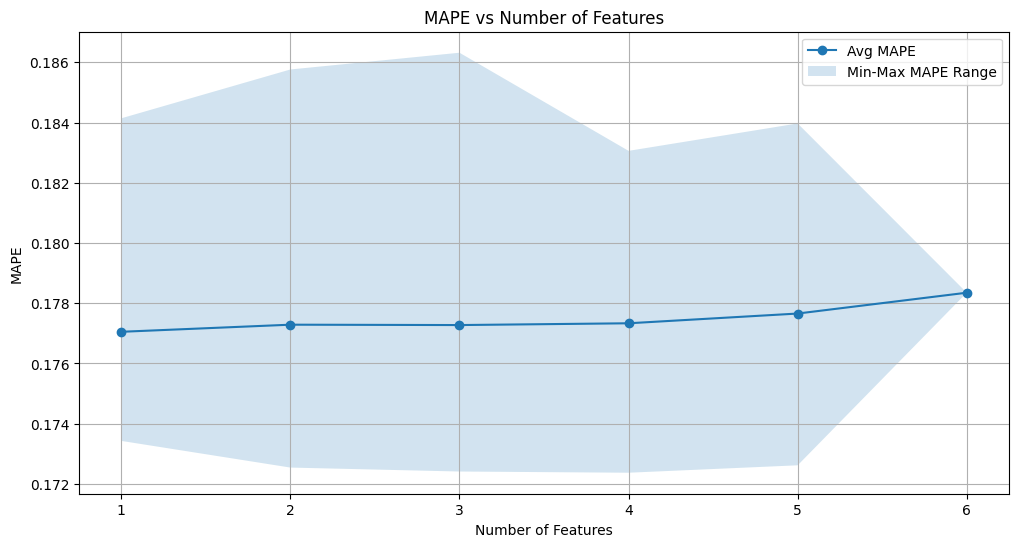

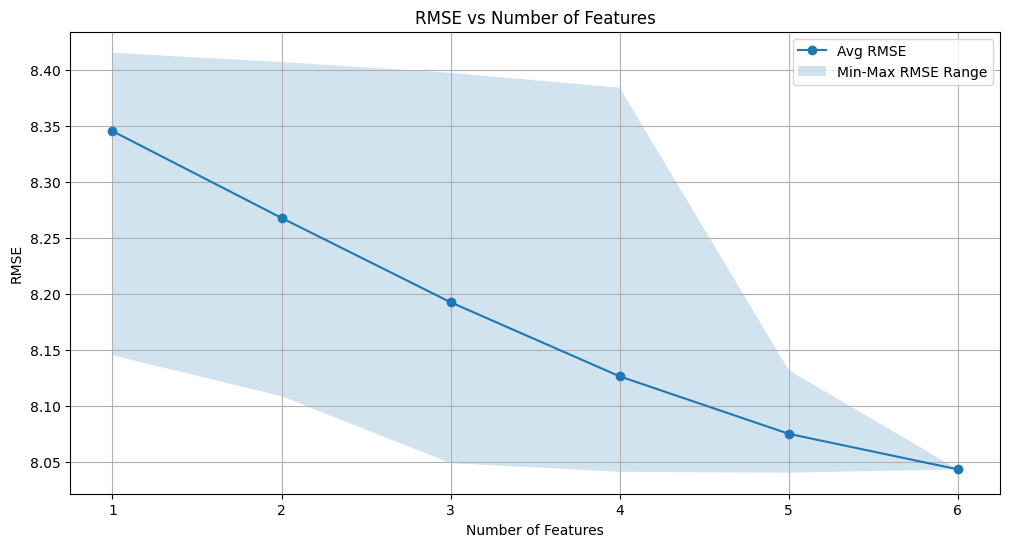

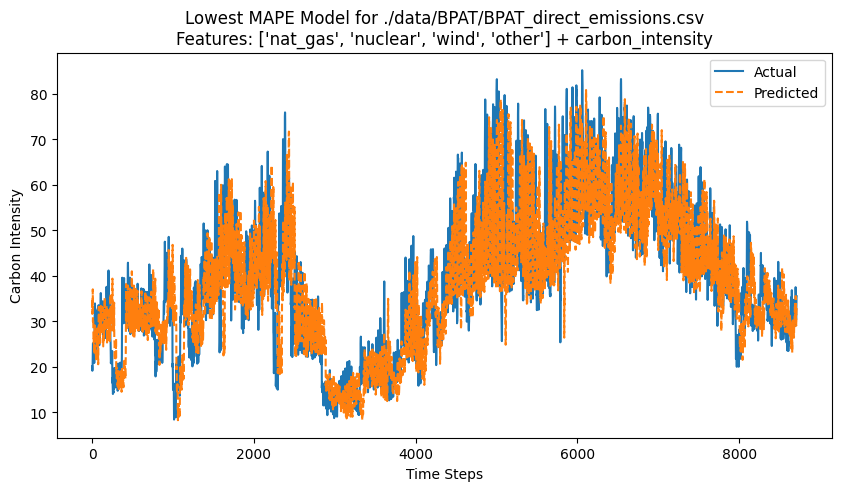

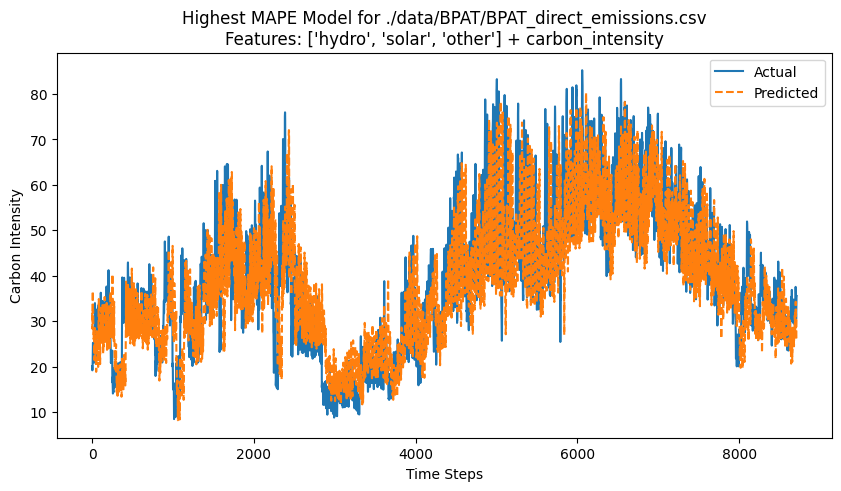

In [234]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
from sklearn.preprocessing import MinMaxScaler
from itertools import combinations

# Function to prepare data with MinMax scaling for normalization
def prepare_data(df, train_year, test_year, feature_columns):
    df['UTC time'] = pd.to_datetime(df['UTC time'])
    df = df[~((df['UTC time'].dt.year == 2020) & 
              (df['UTC time'].dt.month == 2) & 
              (df['UTC time'].dt.day == 29))]
    
    # Separate training and testing data
    train_data = df[df['UTC time'].dt.year == train_year]
    test_data = df[df['UTC time'].dt.year == test_year]
    
    # Define features and target with MinMax Scaling
    scaler_x = MinMaxScaler()
    scaler_y = MinMaxScaler()

    X_train = scaler_x.fit_transform(train_data[feature_columns + ['carbon_intensity']].values[:-24])
    y_train = scaler_y.fit_transform(train_data['carbon_intensity'].values[24:].reshape(-1, 1))
    
    X_test = scaler_x.transform(test_data[feature_columns + ['carbon_intensity']].values[:-24])
    y_test = scaler_y.transform(test_data['carbon_intensity'].values[24:].reshape(-1, 1))
    
    return X_train, y_train, X_test, y_test, scaler_y

# Function to evaluate models for each feature combination
def evaluate_models(df, train_year, test_year, energy_sources):
    results = []
    for k in range(1, len(energy_sources) + 1):
        for feature_columns in combinations(energy_sources, k):
            feature_columns = list(feature_columns)
            X_train, y_train, X_test, y_test, scaler_y = prepare_data(df, train_year, test_year, feature_columns)
            
            model = LinearRegression()
            model.fit(X_train, y_train)
            y_pred = model.predict(X_test[:-24])
            y_pred_rescaled = scaler_y.inverse_transform(y_pred)
            y_test_rescaled = scaler_y.inverse_transform(y_test[24:])
            
            rmse = np.sqrt(mean_squared_error(y_test_rescaled, y_pred_rescaled))
            mape = mean_absolute_percentage_error(y_test_rescaled, y_pred_rescaled)
            
            results.append({
                "Num Features": k,
                "Features": feature_columns,
                "MAPE": mape,
                "RMSE": rmse,
                "y_test": y_test_rescaled,
                "y_pred": y_pred_rescaled
            })
    return results

# Function to create summary tables for best and worst results
def create_summary_tables(results):
    # Create a DataFrame for all results
    all_results_df = pd.DataFrame(results)
    print("All Results:\n", all_results_df)
    
    # Find best and worst MAPE
    best_mape = all_results_df.loc[all_results_df['MAPE'].idxmin()]
    worst_mape = all_results_df.loc[all_results_df['MAPE'].idxmax()]
    
    # Find best and worst RMSE
    best_rmse = all_results_df.loc[all_results_df['RMSE'].idxmin()]
    worst_rmse = all_results_df.loc[all_results_df['RMSE'].idxmax()]
    
    # Create summary DataFrames
    summary_df = pd.DataFrame({
        "Metric": ["Best MAPE", "Worst MAPE", "Best RMSE", "Worst RMSE"],
        "Features": [best_mape['Features'], worst_mape['Features'], best_rmse['Features'], worst_rmse['Features']],
        "MAPE": [best_mape['MAPE'], worst_mape['MAPE'], best_rmse['MAPE'], worst_rmse['MAPE']],
        "RMSE": [best_mape['RMSE'], worst_mape['RMSE'], best_rmse['RMSE'], worst_rmse['RMSE']]
    })
    
    print("\nSummary of Best and Worst Models:\n", summary_df)
    return all_results_df, summary_df

# Function to plot MAPE and RMSE results
def plot_mape_rmse(results):
    mape_data = []
    rmse_data = []

    for k in sorted(results.keys()):
        mape_values = [res['MAPE'] for res in results[k]]
        rmse_values = [res['RMSE'] for res in results[k]]
        
        mape_data.append((k, np.mean(mape_values), np.min(mape_values), np.max(mape_values)))
        rmse_data.append((k, np.mean(rmse_values), np.min(rmse_values), np.max(rmse_values)))
    
    # Convert to DataFrames for plotting
    mape_df = pd.DataFrame(mape_data, columns=["Features", "MAPE Avg", "MAPE Min", "MAPE Max"])
    rmse_df = pd.DataFrame(rmse_data, columns=["Features", "RMSE Avg", "RMSE Min", "RMSE Max"])
    
    # Plotting MAPE
    plt.figure(figsize=(12, 6))
    plt.plot(mape_df["Features"], mape_df["MAPE Avg"], label="Avg MAPE", marker='o')
    plt.fill_between(mape_df["Features"], mape_df["MAPE Min"], mape_df["MAPE Max"], alpha=0.2, label="Min-Max MAPE Range")
    plt.xlabel("Number of Features")
    plt.ylabel("MAPE")
    plt.title("MAPE vs Number of Features")
    plt.legend()
    plt.grid()
    plt.show()

    # Plotting RMSE
    plt.figure(figsize=(12, 6))
    plt.plot(rmse_df["Features"], rmse_df["RMSE Avg"], label="Avg RMSE", marker='o')
    plt.fill_between(rmse_df["Features"], rmse_df["RMSE Min"], rmse_df["RMSE Max"], alpha=0.2, label="Min-Max RMSE Range")
    plt.xlabel("Number of Features")
    plt.ylabel("RMSE")
    plt.title("RMSE vs Number of Features")
    plt.legend()
    plt.grid()
    plt.show()

# Function to plot Actual vs Predicted for Lowest and Highest MAPE
def plot_actual_vs_predicted(region_results):
    for region, results in region_results.items():
        min_mape_result = min(results, key=lambda x: x["MAPE"])
        max_mape_result = max(results, key=lambda x: x["MAPE"])
        
        # Plotting for lowest MAPE
        plt.figure(figsize=(10, 5))
        plt.plot(min_mape_result["y_test"], label="Actual")
        plt.plot(min_mape_result["y_pred"], label="Predicted", linestyle='--')
        plt.title(f"Lowest MAPE Model for {region}\nFeatures: {min_mape_result['Features']} + carbon_intensity")
        plt.xlabel("Time Steps")
        plt.ylabel("Carbon Intensity")
        plt.legend()
        plt.show()
        
        # Plotting for highest MAPE
        plt.figure(figsize=(10, 5))
        plt.plot(max_mape_result["y_test"], label="Actual")
        plt.plot(max_mape_result["y_pred"], label="Predicted", linestyle='--')
        plt.title(f"Highest MAPE Model for {region}\nFeatures: {max_mape_result['Features']} + carbon_intensity")
        plt.xlabel("Time Steps")
        plt.ylabel("Carbon Intensity")
        plt.legend()
        plt.show()

# Load datasets for multiple regions
regions = ['./data/BPAT/BPAT_direct_emissions.csv']  # Replace with actual paths
region_results = {}
energy_sources = ['nat_gas', 'nuclear', 'hydro', 'solar', 'wind', 'other']

for region_file in regions:
    df = pd.read_csv(region_file)  # Ensure the paths are correct
    results = evaluate_models(df, train_year=2020, test_year=2021, energy_sources=energy_sources)
    region_results[region_file] = results

# Aggregate results across regions
aggregated_results = {}
for region, results in region_results.items():
    for res in results:
        k = res["Num Features"]
        if k not in aggregated_results:
            aggregated_results[k] = []
        aggregated_results[k].append(res)

# Display and plot results
all_results_df, summary_df = create_summary_tables(results)
plot_mape_rmse(aggregated_results)
plot_actual_vs_predicted(region_results)

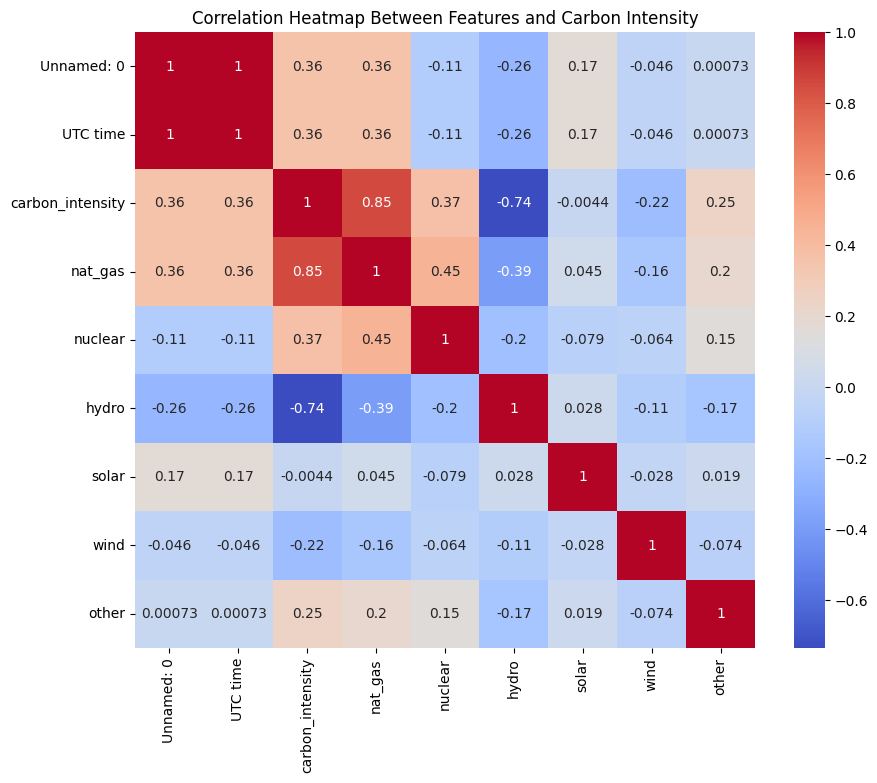

In [235]:
import seaborn as sns
plt.figure(figsize=(10, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap Between Features and Carbon Intensity")
plt.show()

# Summarizing my findings

Certainly! Here’s a detailed analysis and interpretation of each graph and what the results imply about the linear regression model’s effectiveness in predicting carbon intensity.

---

### 1. **MAPE vs. Number of Features**
   - **Interpretation**: This graph shows the effect of adding more features (variables) on the Mean Absolute Percentage Error (MAPE) for the model. The average MAPE line indicates the overall prediction accuracy trend as more features are used, and the shaded region represents the minimum and maximum MAPE values for each combination.
   - **Insights**:
      - **Stable Performance**: The relatively flat trend in MAPE suggests that adding more features beyond a certain point does not substantially improve or worsen the model's accuracy. The model may be capturing most of the signal with fewer features, implying some variables may be redundant.
      - **Range Variation**: The min-max range increases as more features are added, suggesting that certain combinations of features result in significantly better or worse performance. This variability highlights the importance of carefully selecting features rather than simply adding more.
      - **Implications**: The model’s performance could be optimized by identifying a core set of impactful features rather than including all available features. Reducing the number of features could also help in improving model interpretability without sacrificing much accuracy.

### 2. **RMSE vs. Number of Features**
   - **Interpretation**: This graph presents the Root Mean Squared Error (RMSE) as the number of features increases, with a similar shaded region indicating the minimum and maximum RMSE for each count of features.
   - **Insights**:
      - **Declining RMSE**: The downward trend in RMSE suggests that adding more features consistently improves the model’s fit, reducing error as it captures more variability in the data.
      - **Convergence**: The RMSE curve flattens out with a higher number of features, indicating diminishing returns. After a certain point, additional features provide only marginal improvements, which could be due to multicollinearity or noise introduced by redundant variables.
      - **Implications**: The results suggest that a balanced approach is needed to achieve a good fit without overfitting. Adding more features may reduce RMSE but could also increase the model's complexity without a significant gain in generalization.

### 3. **Actual vs. Predicted Carbon Intensity (Lowest MAPE)**
   - **Interpretation**: This plot compares the actual and predicted carbon intensity values for the model with the lowest MAPE. It visualizes how well the model tracks actual carbon intensity over time.
   - **Insights**:
      - **Close Fit**: The predicted values (orange) closely follow the actual values (blue), showing that the model captures the general trend and seasonal variations effectively.
      - **Limitations in Peak Capture**: Although the model performs well overall, there may be slight deviations during peak values. This limitation may be due to linear regression’s inability to fully capture complex non-linear relationships in the data.
      - **Implications**: This model configuration (features selected based on lowest MAPE) shows promise as it provides a relatively accurate prediction. However, exploring non-linear models like decision trees or neural networks could further improve peak and extreme value predictions.

### 4. **Actual vs. Predicted Carbon Intensity (Highest MAPE)**
   - **Interpretation**: Similar to the previous plot, this graph shows the actual vs. predicted values for the model configuration with the highest MAPE. It highlights a scenario where the model has struggled the most.
   - **Insights**:
      - **Poor Fit**: There is a noticeable lag and mismatch in the prediction line, indicating that this model configuration failed to capture the dynamics of carbon intensity accurately.
      - **Possibly Misleading Features**: The high error here suggests that the combination of features may have introduced noise or misdirection, leading the model to inaccurate predictions. Certain energy sources might not have contributed positively to prediction accuracy, possibly due to weak or spurious correlations with carbon intensity.
      - **Implications**: This result emphasizes the need for careful feature selection. Including features without strong relevance to the target variable can degrade model performance. The insights from this model can help refine feature selection in future models.

### 5. **Correlation Heatmap**
   - **Interpretation**: This heatmap shows the correlation between each feature (energy sources and carbon intensity) and the target variable, carbon intensity.
   - **Insights**:
      - **Strong Correlations**: Features like "nat_gas" show a strong positive correlation with carbon intensity, indicating that natural gas usage is a significant contributor to carbon emissions.
      - **Negative and Weak Correlations**: Some features like "hydro" and "wind" have negative or very weak correlations with carbon intensity, suggesting that their influence on carbon emissions is minimal or even inversely related (e.g., renewable sources tend to lower emissions).
      - **Feature Redundancy**: Certain features may be correlated with each other, which can introduce multicollinearity issues in linear regression. For example, "nat_gas" and "carbon_intensity" are highly correlated, which could overshadow the influence of other variables in a multivariate model.
      - **Implications**: This heatmap can guide feature selection for the model by focusing on variables with strong positive correlations with carbon intensity. It also suggests that some renewable sources might not directly impact emissions in a linear model, so they might be excluded or treated differently in more complex models.

# TL;DR

### Key Findings

1. **Best MAPE**: The model using features `[nat_gas, nuclear, wind, other]` achieved the lowest MAPE (0.172370) with an RMSE of 8.118. This indicates that this combination of features provided the most accurate percentage-based predictions of carbon intensity. The mix of highly correlated energy sources with carbon intensity (like `nat_gas` and `nuclear`) likely helped improve the model's accuracy by closely capturing underlying trends.

2. **Worst MAPE**: The feature combination `[hydro, solar, other]` resulted in the highest MAPE (0.186318), suggesting that these variables were less predictive or introduced noise into the model. These energy sources might contribute less consistently to carbon intensity, as renewable sources like `hydro` and `solar` tend to have variable generation patterns that may not align well with linear modeling.

3. **Best RMSE**: The model with `[nat_gas, nuclear, hydro, wind, other]` yielded the lowest RMSE (8.040020), meaning it was the best at minimizing the absolute error of predictions. Adding `hydro` to the previously successful combination may have helped slightly reduce error due to capturing a broader range of carbon intensity influencers.

4. **Worst RMSE**: Using only the `solar` feature led to the highest RMSE (8.414982), highlighting that single-feature models, especially with variables like `solar`, don’t capture the full variance of carbon intensity. Solar generation can be inconsistent, and using it alone fails to account for the broader factors influencing emissions.

### Overall Implications

- **Feature Selection**: The models show that feature selection impacts both MAPE and RMSE significantly. Combinations with high-correlated sources (`nat_gas`, `nuclear`, and `wind`) perform better, while lower-correlation features (like `solar` and `hydro`) reduce accuracy.

Compared to the univariate model results, where the RMSE was 6.622 and MAPE was 0.129, the multivariate models generally produced higher error rates. The best multivariate model achieved an RMSE of 8.040 and a MAPE of 0.172, indicating that adding more energy sources did not necessarily improve prediction accuracy in this linear regression context. This suggests that the univariate model was potentially better suited to capture the direct relationship between a single energy source and carbon intensity, while the multivariate approach may have introduced additional noise or complexity that a linear model struggled to interpret effectively. I think a non-linear modeling technique might be needed to fully leverage multivariate data for more accurate carbon intensity predictions.